## suggestion1:
在使用聚类分析时，在选取分类数量个数时，可以采取Elbow Method计算各个数量的wcss来提高聚类效率，以下为源代码和修改后的代码

# 源代码：

In [ ]:
#使用K-mean对经纬度进行聚类
def kmeans(data):
    kmeans = KMeans(n_clusters=10, random_state=42)
    data["location_cluster"] = kmeans.fit_predict(data[["lon", "lat"]])
    data=data.drop(columns=["lon","lat"])
    return data

# 修改后的代码：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

ori_pre_data=pd.read_csv('ori_pre_data.csv')
ori_train_data=pd.read_csv('ori_train_data.csv')
data=pd.concat([ori_pre_data,ori_train_data])

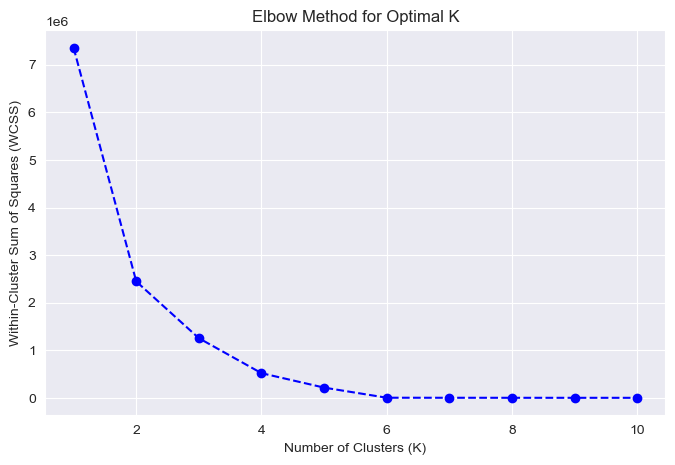

In [5]:
wcss = []
k_range = range(1, 11)  # 测试K=1到K=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data[["lon", "lat"]])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

#更新聚类数量后的函数：
def kmeans2(data):
    kmeans = KMeans(n_clusters=6, random_state=42)
    data["location_cluster"] = kmeans.fit_predict(data[["lon", "lat"]])
    data=data.drop(columns=["lon","lat"])
    return data


## suggestion2:
处理环线信息时，未考虑到不同城市的城市布局差异。可以尝试按照不同城市分类处理环线信息。


# 源代码

In [ ]:
#环线处理
def simplify_ring(x):
    ring={"核心" :["内环内","一至二环","二环内","一环内"],
    "市中心" : [ "二至三环", "三至四环","内环至中环"],
    "近郊": ["内环至外环","四至五环", "五至六环", "中环至外环"],
    "远郊" : ["六环外", "外环外"],
    "其他":["三环外", "四环外", "其他"]}
    for key , item in ring.items():
        if x in ring[key]:
            return key
    

## suggestion3:
数据格式验证：在调用如 house_type、elevator_ratio 等函数处理数据列前，先验证数据格式。比如在 house_type 函数处理 “房屋户型” 列前，检查该列数据是否为字符串类型，若不是则进行类型转换或抛出合适的异常提示数据格式错误。


# 源代码

In [ ]:
import re


# 房屋类型处理
def house_type(x):
    pattern_1 = r"(\d+)室(\d+)厅(\d+)厨(\d+)卫"
    pattern_2 = r"(\d+)房间(\d+)卫"
    match = re.search(pattern_1, x)
    if match:
        return {"房间个数": match.group(1), "厅个数": match.group(3), "厨房个数": match.group(2), "厕所个数": match.group(4)}
    else:
        match_2 = re.search(pattern_2, x)
        if match_2:
            return {"房间个数": match_2.group(1), "厅个数": 0, "厨房个数": 0, "厕所个数": match_2.group(2)}


# 梯户比处理
def elevator_ratio(x):
    pattern = r"(\d+)梯(\d+)户"
    match = re.search(pattern, x)
    if match:
        elevators = match.group(1)
        households = match.group(2)
        elevators_num = int(float(elevators))
        households_num = int(float(households))
        return elevators_num / households_num

# 修改后的代码：

In [ ]:
import re


# 房屋类型处理
def house_type(x):
    # 数据格式验证
    if not isinstance(x, str):
        raise TypeError(f"传入house_type函数的数据类型应为str，实际传入的是{type(x)}")
    pattern_1 = r"(\d+)室(\d+)厅(\d+)厨(\d+)卫"
    pattern_2 = r"(\d+)房间(\d+)卫"
    match = re.search(pattern_1, x)
    if match:
        return {"房间个数": match.group(1), "厅个数": match.group(3), "厨房个数": match.group(2), "厕所个数": match.group(4)}
    else:
        match_2 = re.search(pattern_2, x)
        if match_2:
            return {"房间个数": match_2.group(1), "厅个数": 0, "厨房个数": 0, "厕所个数": match_2.group(2)}


# 梯户比处理
def elevator_ratio(x):
    # 数据格式验证
    if not isinstance(x, str):
        raise TypeError(f"传入elevator_ratio函数的数据类型应为str，实际传入的是{type(x)}")
    pattern = r"(\d+)梯(\d+)户"
    match = re.search(pattern, x)
    if match:
        elevators = match.group(1)
        households = match.group(2)
        elevators_num = int(float(elevators))
        households_num = int(float(households))
        return elevators_num / households_num